In [6]:
import os
import numpy as np
import pandas as pd

file_path = './test_results.xlsx'

df_raw = pd.read_excel(file_path, engine='openpyxl')
df_raw = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]

In [21]:
pivot_index = list(df_raw.columns[0:18]) # accuracy 전까지
pivot_index.remove('drift_model')
pivot_index.remove('n_rep')
pivot_index.remove('pruning')
pivot_index.remove('Gmax')
pivot_index.remove('Gmin')
pivot_index.remove('retrain')
pivot_index.remove('G_ratio')
pivot_index

['model',
 'dataset',
 'device',
 'IOparameter',
 'GDC',
 'mapping_scaling_omega',
 'noise_model',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'inf_time']

In [46]:
df = df_raw.copy()

In [47]:
# df = df[df['G_ratio']==25]
df = df[df['model']=='Resnet18']
df = df[df['GDC'] == 'on']
df = df[df['IOparameter'] == 'ideal']
df = df[df['pgm_noise_scale'] == 1]
df = df[df['retrain'] == 'X']

df = df[(df['drift_model'] == 0.01)  | (df['drift_model'] == 'log')]

In [48]:
df['pruning'].unique()

array(['-', 0.3, 0.4, 0.5, 0.6, 0.7], dtype=object)

In [49]:
df['Gmin'].unique()

array(['default', 0, 1, 2, 5, 7, 10], dtype=object)

In [50]:
df['new_col'] = df['pruning'].astype(str) + '_' + df['Gmin'].astype(str) + '_' + df['drift_model'].astype(str)

In [51]:
df['new_col'].unique()

array(['-_default_log', '-_default_0.01', '0.3_default_log',
       '0.4_default_log', '0.5_default_log', '0.6_default_log',
       '0.7_default_log', '0.3_default_0.01', '0.4_default_0.01',
       '0.5_default_0.01', '0.6_default_0.01', '0.7_default_0.01',
       '-_0_log', '-_1_log', '-_2_log', '-_5_log', '-_7_log', '-_10_log',
       '-_0_0.01', '-_1_0.01', '-_2_0.01', '-_5_0.01', '-_7_0.01',
       '-_10_0.01'], dtype=object)

In [52]:
df_pivot = df.pivot_table(index=pivot_index, columns='new_col', values='accuracy', aggfunc='mean')
df_pivot.reset_index(inplace=True) # index to columns 

In [53]:
df_pivot

new_col,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,...,0.3_default_0.01,0.3_default_log,0.4_default_0.01,0.4_default_log,0.5_default_0.01,0.5_default_log,0.6_default_0.01,0.6_default_log,0.7_default_0.01,0.7_default_log
0,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,91.040001,91.040001,91.240005,91.240005,88.776993,88.776993,83.521004,83.521004,42.099998,42.099998
1,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,90.727005,90.727997,91.053001,91.076004,88.879997,88.842003,83.505997,83.597,46.459999,46.32
2,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,90.750999,90.546005,90.677994,90.663994,88.67601,88.316994,83.229004,83.179001,42.240002,41.98
3,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,90.754005,90.044006,90.797005,90.441002,88.153992,87.031006,83.212997,82.393997,42.68,40.939999
4,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,90.401993,89.432999,90.775993,89.940002,87.811996,85.977005,82.797997,81.220993,44.639999,41.84
5,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,90.146996,88.541,90.072998,88.778,87.322006,84.695999,81.786003,79.060989,38.959999,35.689999
6,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,89.621994,87.061996,89.507996,87.192993,86.811996,82.897003,81.916,77.259003,46.07,41.32
7,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,88.469994,80.671005,89.169998,82.231995,85.693001,76.086998,80.873001,70.723999,41.5,34.029999
8,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,87.946999,76.093002,88.080009,77.918007,84.442001,72.045998,78.897995,64.218002,42.330002,33.48
9,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,87.234001,72.081001,87.106003,72.488007,83.612999,67.151001,78.607994,60.733002,40.610001,32.630001


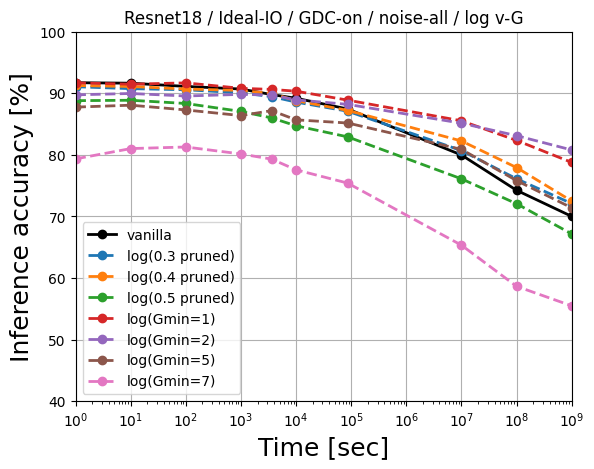

In [58]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_default_log'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_default_log'], marker='o', label = 'log(0.3 pruned)', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_default_log'], marker='o', label = 'log(0.4 pruned)', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_default_log'], marker='o', label = 'log(0.5 pruned)', linestyle='--', linewidth=2)

plt.plot(x,df_pivot['-_1_log'], marker='o', label = 'log(Gmin=1)', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['-_2_log'], marker='o', label = 'log(Gmin=2)', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['-_5_log'], marker='o', label = 'log(Gmin=5)', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['-_7_log'], marker='o', label = 'log(Gmin=7)', linestyle='--', linewidth=2)
# plt.plot(x,df_pivot['-_10_log'], marker='o', label = 'log(Gmin=10)', linestyle='--', linewidth=2)


plt.title("Resnet18 / Ideal-IO / GDC-on / noise-all / log v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(40,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

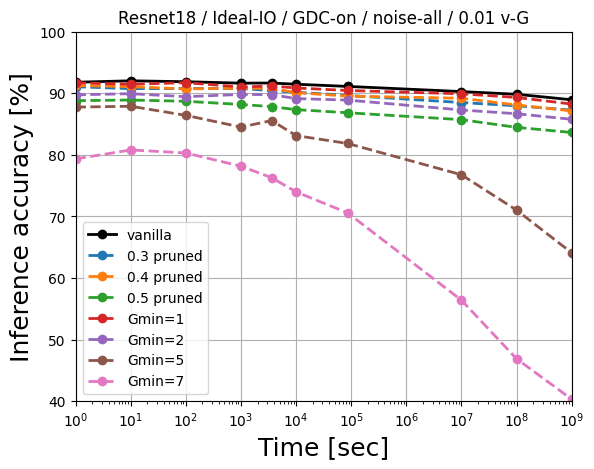

In [57]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_default_0.01'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_default_0.01'], marker='o', label = '0.3 pruned', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_default_0.01'], marker='o', label = '0.4 pruned', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_default_0.01'], marker='o', label = '0.5 pruned', linestyle='--', linewidth=2)

plt.plot(x,df_pivot['-_1_0.01'], marker='o', label = 'Gmin=1', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['-_2_0.01'], marker='o', label = 'Gmin=2', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['-_5_0.01'], marker='o', label = 'Gmin=5', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['-_7_0.01'], marker='o', label = 'Gmin=7', linestyle='--', linewidth=2)
# plt.plot(x,df_pivot['-_10_log'], marker='o', label = 'log(Gmin=10)', linestyle='--', linewidth=2)


plt.title("Resnet18 / Ideal-IO / GDC-on / noise-all / 0.01 v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(40,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()